# Import Necessary Libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Standard library imports
import warnings # For warning handling
# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

# Load The Dataset

In [80]:
car_df=pd.read_csv("CarPrice_Assignment.csv")
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Explore the Data

In [81]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [82]:
# Show the shape of the dataset
print("The shape =", car_df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = car_df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")


The shape = (205, 26)
Number of Rows: 205
Number of Columns: 26
Number of Features: 25
Number of All Data: 5330


In [83]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [84]:
car_df.iloc[:, :13]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5


In [85]:
car_df.iloc[:, -13:] 

,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [86]:
# Descriptive Statistics of Numeric Variables only.
car_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.00,59.32,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17


In [87]:
car_df['price'].median()

10295.0

In [88]:
# Descriptive analysis of Categorical Variables only.
car_df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# Null value detection

In [89]:
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [90]:
car_df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [91]:
carnames=car_df['CarName'].apply(lambda x: x.split(" ")[0]) # Seperate car Company from carname 

In [92]:
carnames[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CarName, dtype: object

In [93]:
#car_df['Car_Company']=carnames
car_df.insert(2, 'Car_Company', carnames)

In [94]:
car_df['Car_Company'].value_counts()

Car_Company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [95]:
#replacing carname
car_df.loc[car_df['Car_Company']=='porcshce','Car_Company']='porsche'
car_df.loc[(car_df['Car_Company']=='vokswagen')|(car_df['Car_Company']=='vw'),'Car_Company']='volkswagen'
car_df.loc[car_df['Car_Company']=='maxda','Car_Company']='mazda'
car_df.loc[car_df['Car_Company']=='Nissan','Car_Company']='nissan'
car_df.loc[car_df['Car_Company']=='toyouta','Car_Company']='toyota'

In [96]:
car_df['Car_Company'].value_counts()

Car_Company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [97]:
car_df.drop_duplicates(inplace=True)

In [98]:
car_df

,car_ID,symboling,Car_Company,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,volvo 244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,volvo 246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [99]:
car_df.drop('car_ID',axis=1, inplace=True)
car_df.drop('CarName',axis=1, inplace=True)

In [100]:
car_df.shape

(205, 25)

In [101]:
car_df

,symboling,Car_Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [102]:
print("Type of index \n",car_df.nunique(),"\n")

Type of index 
 symboling             6
Car_Company          22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64 



In [103]:
car_df.describe(include=object)

,Car_Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


# Visualizing the data

# Graphical Analysis

In [104]:
...
# 
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'] 
# 
categorical_columns = ['Car_Company', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
...

Ellipsis

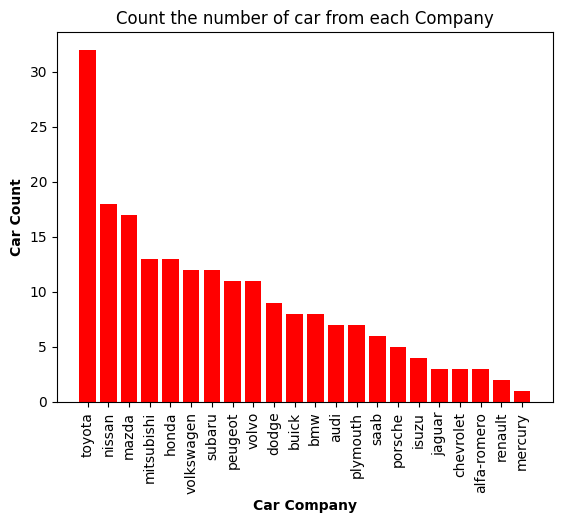

In [105]:
# Bar Charts Analysis "For Car Company feature"
# Count number of car from each company
car_counts = car_df['Car_Company'].value_counts()
#print(car_counts)
#plt.figure(figsize=(15,8))
plt.bar(car_counts.index,car_counts,color='r')
plt.title("Count the number of car from each Company")
plt.xticks(rotation=90)
plt.xlabel("Car Company",fontweight='bold')
plt.ylabel("Car Count",fontweight='bold')
plt.show()

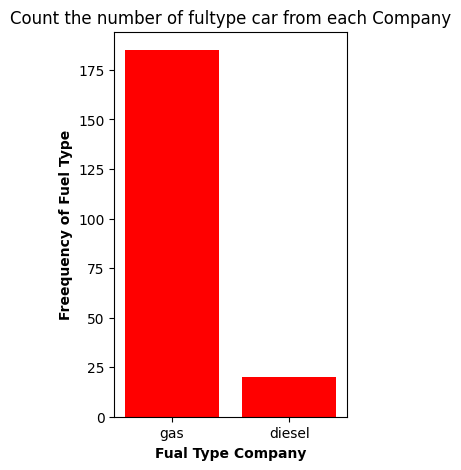

In [106]:
# Count number of fueltype from each car
fueltype_counts = car_df['fueltype'].value_counts()
plt.figure(figsize=(3,5))
plt.bar(fueltype_counts.index,fueltype_counts,color='r')
plt.title("Count the number of fultype car from each Company")
plt.xlabel("Fual Type Company",fontweight='bold')
plt.ylabel("Freequency of Fuel Type",fontweight='bold')
plt.show()

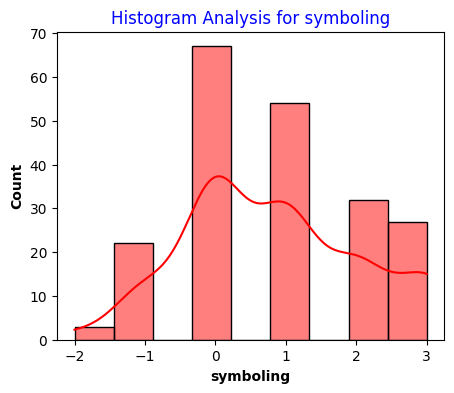

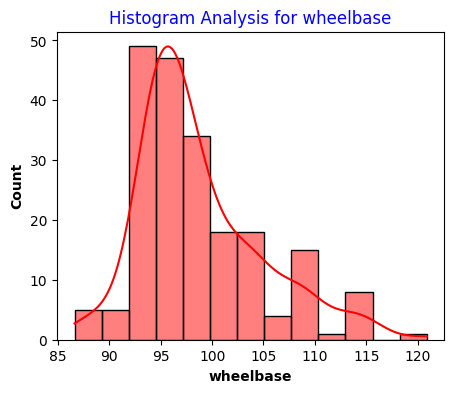

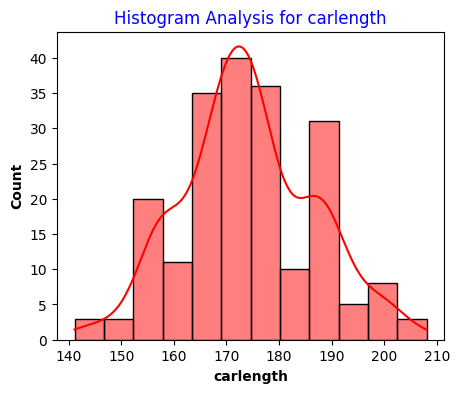

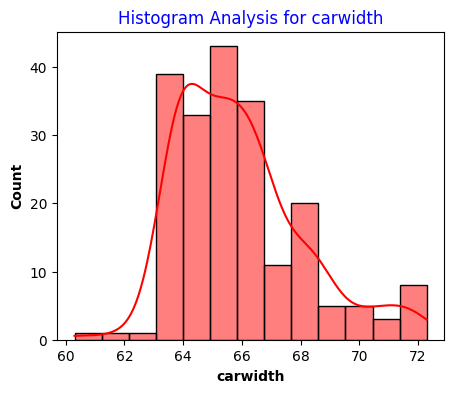

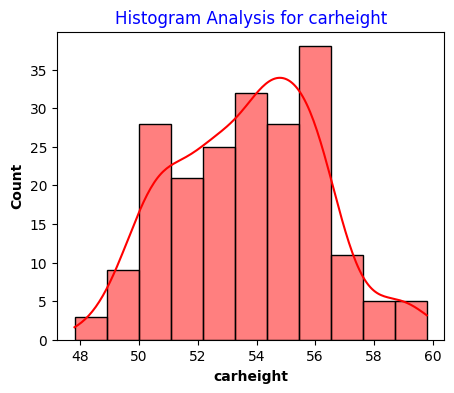

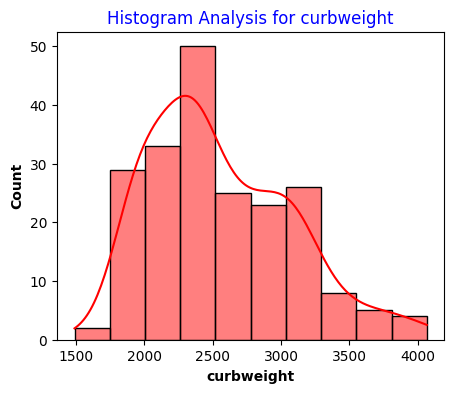

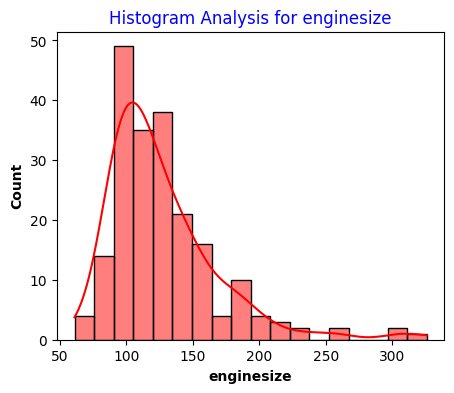

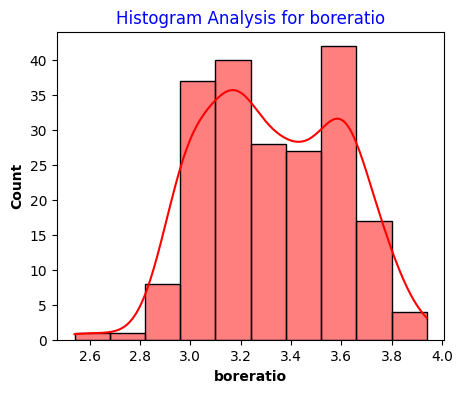

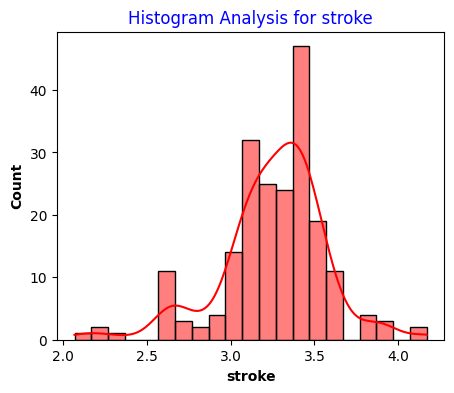

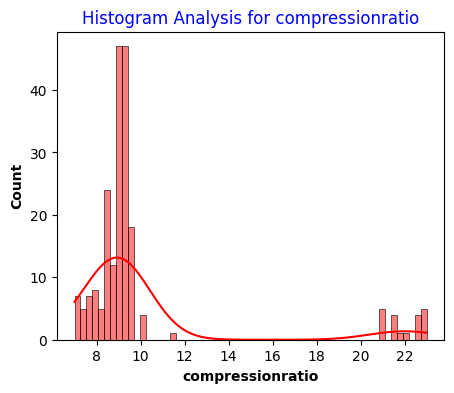

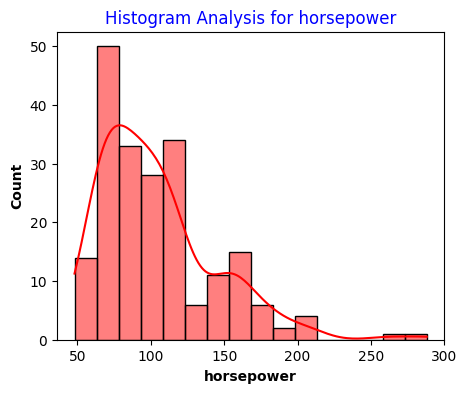

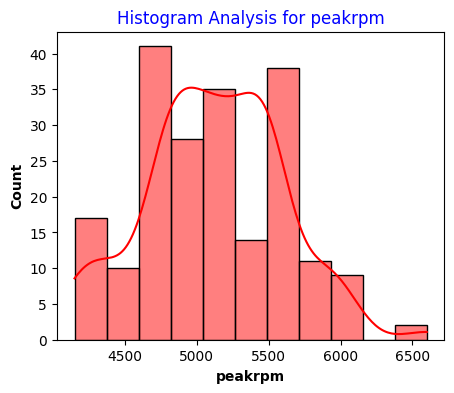

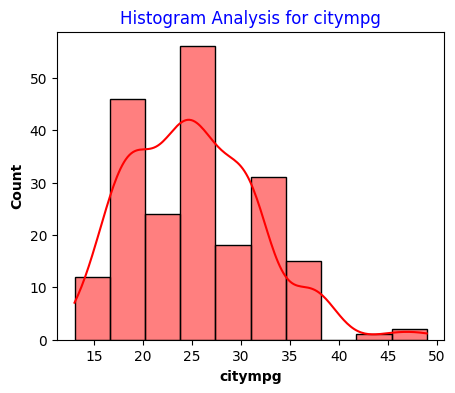

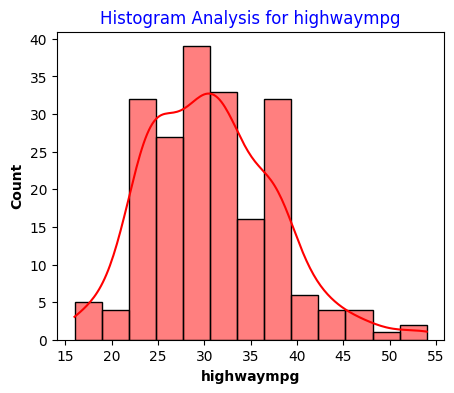

In [107]:
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
                     'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg']
columns_to_plot_num = car_df[numerical_columns]

for column in columns_to_plot_num.columns:
    plt.figure(figsize=(5, 4))
    sns.histplot(columns_to_plot_num[column],kde='True',color='r')
    plt.title(f'Histogram Analysis for {column}',color='blue')
    plt.xlabel(column,fontweight='bold')
    plt.ylabel('Count',fontweight='bold')
    plt.show()

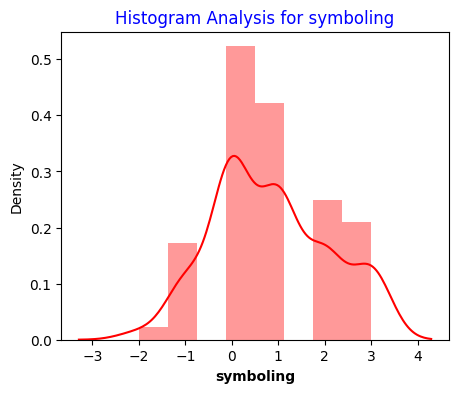

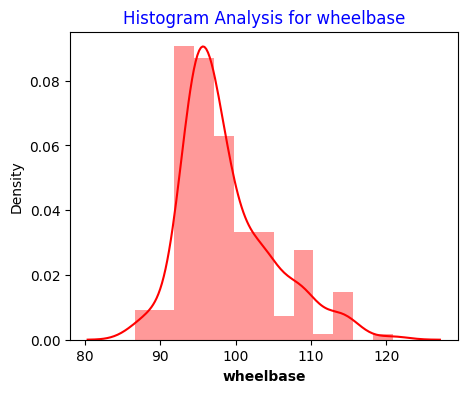

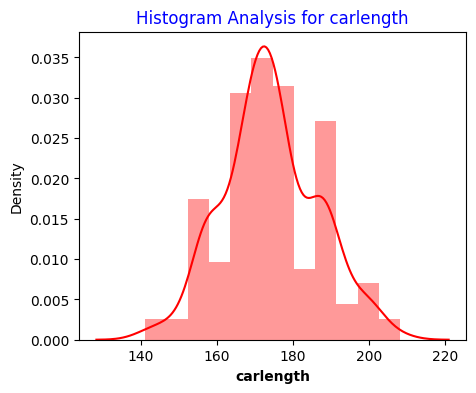

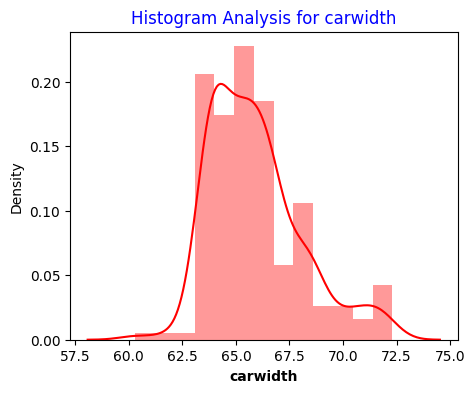

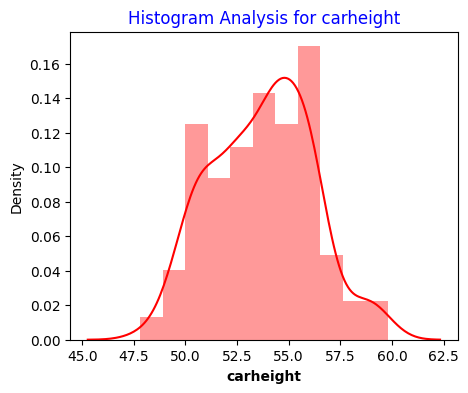

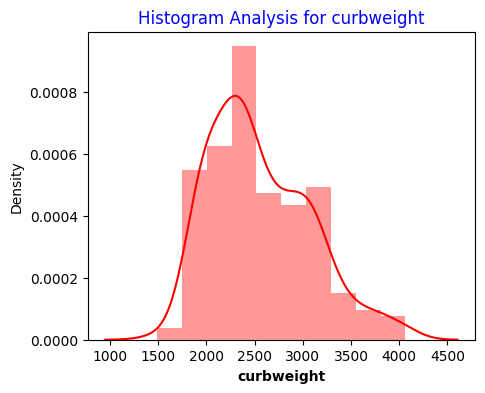

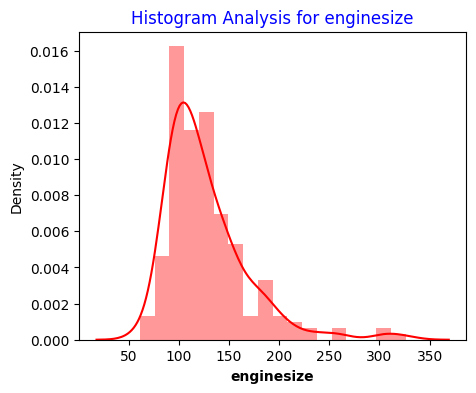

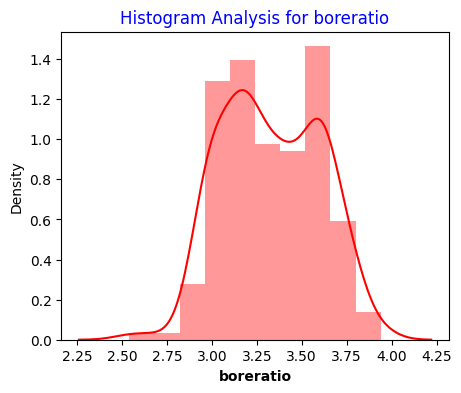

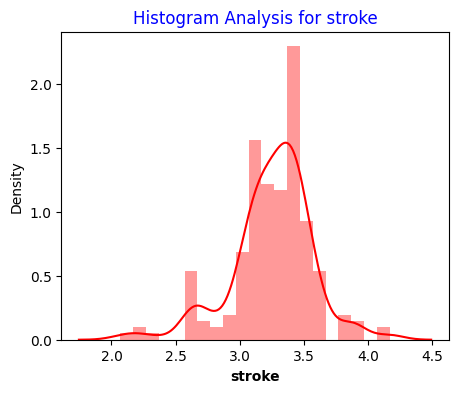

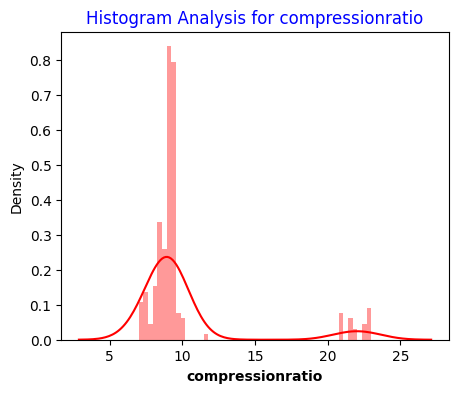

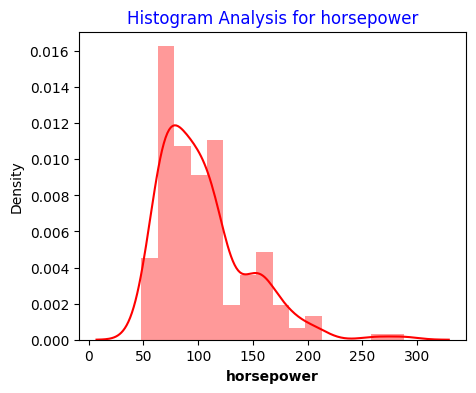

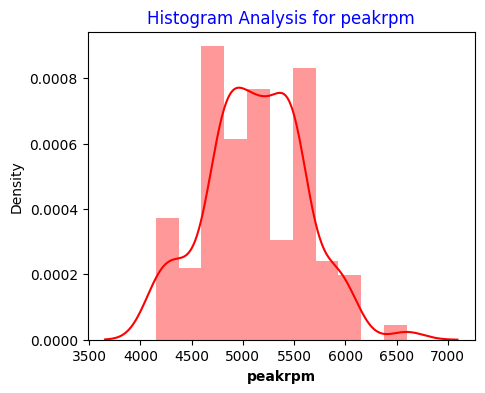

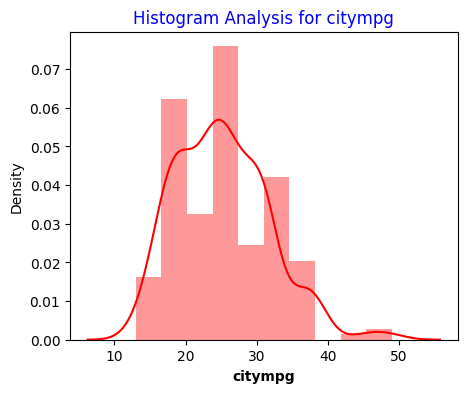

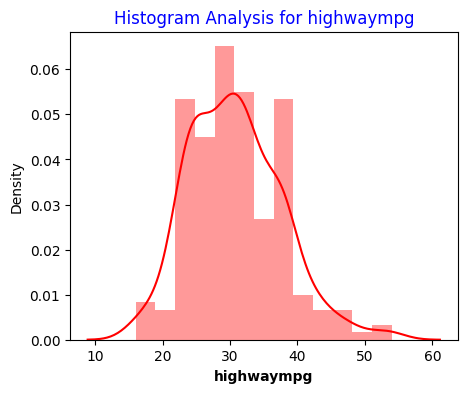

In [108]:
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
                     'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg']
columns_to_plot_num = car_df[numerical_columns]

for column in columns_to_plot_num.columns:
    plt.figure(figsize=(5, 4))
    sns.distplot(columns_to_plot_num[column],color='r')
    plt.title(f'Histogram Analysis for {column}',color='blue')
    plt.xlabel(column,fontweight='bold')
    plt.show()

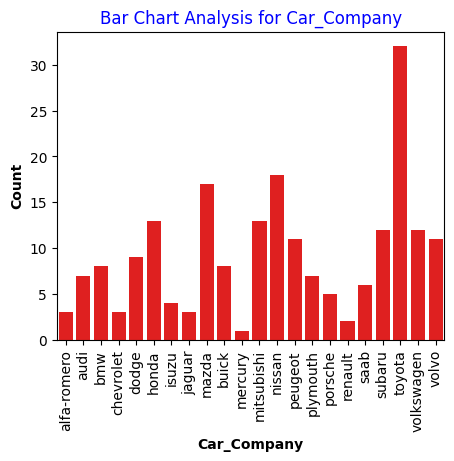

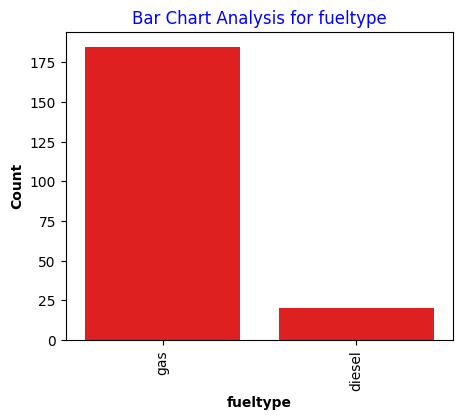

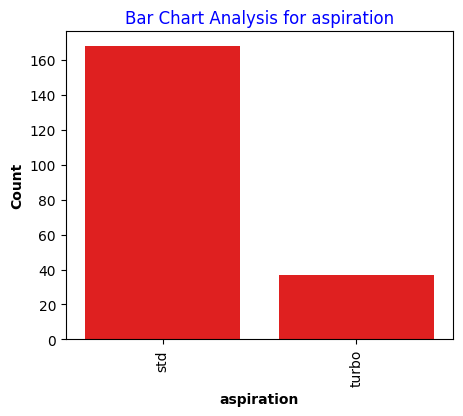

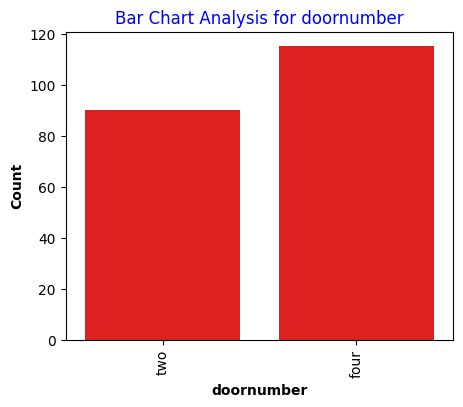

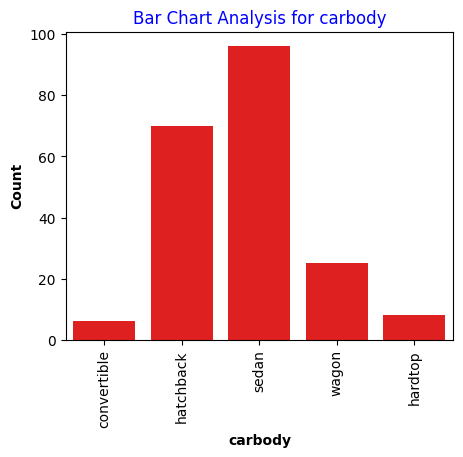

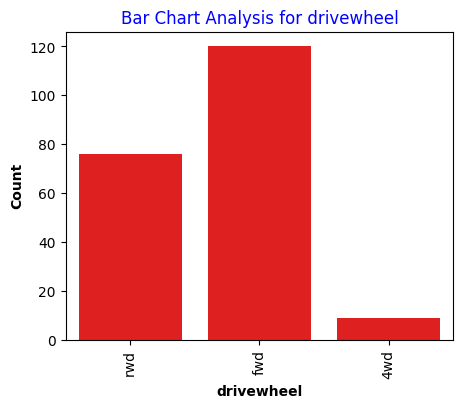

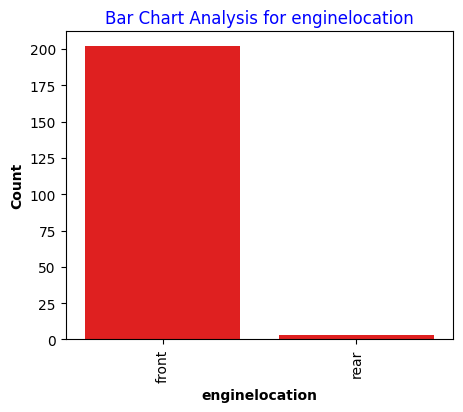

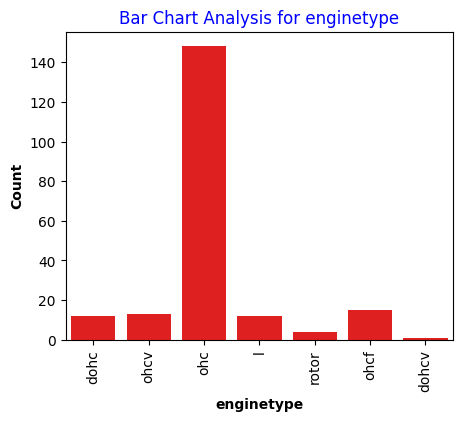

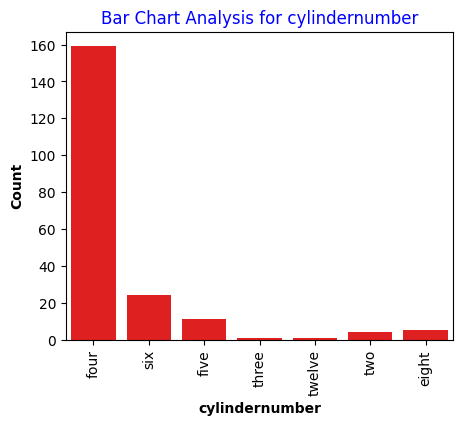

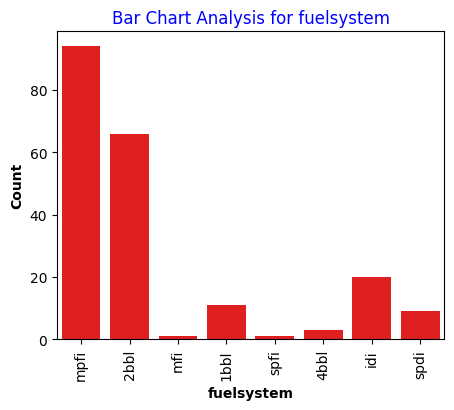

In [109]:
# count plot for categorical columns

categorical_columns = ['Car_Company', 'fueltype', 'aspiration', 'doornumber', 
                       'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
                       'cylindernumber', 'fuelsystem']

columns_to_plot_cat = car_df[categorical_columns]

for column in columns_to_plot_cat.columns:
    plt.figure(figsize=(5, 4))
    #sns.countplot(columns_to_plot_cat[column],color='r')
    sns.countplot(x=columns_to_plot_cat[column], data=car_df,color='r')
    plt.title(f'Bar Chart Analysis for {column}',color='blue')
    plt.xlabel(column,fontweight='bold')
    plt.ylabel('Count',fontweight='bold')
    plt.xticks(rotation=90)
plt.show()

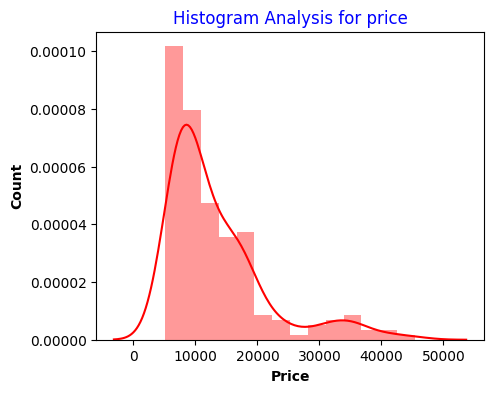

In [110]:

#Histogram Analysis for price
plt.figure(figsize=(5, 4))
sns.distplot(car_df['price'],color='r')
plt.title(f'Histogram Analysis for price',color='blue')
plt.xlabel('Price',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()


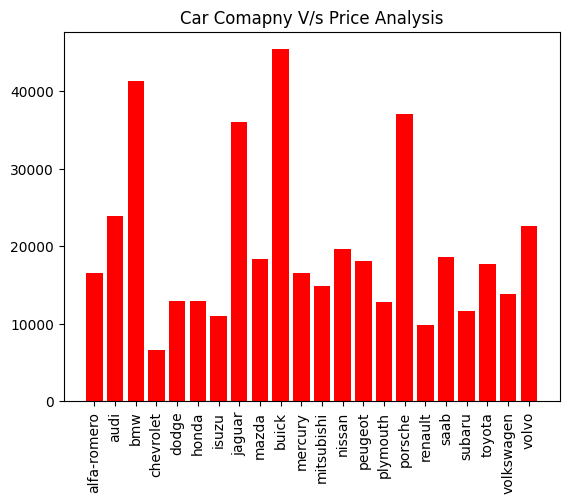

In [111]:
# bar plot for Car company v/s Price

plt.bar(x=car_df['Car_Company'], height=car_df['price'], data=car_df,color='r')
plt.title("Car Comapny V/s Price Analysis")
plt.xticks(rotation=90)

plt.xticks(rotation=90)
plt.show()

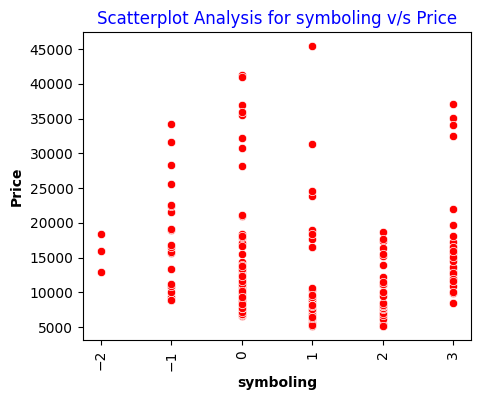

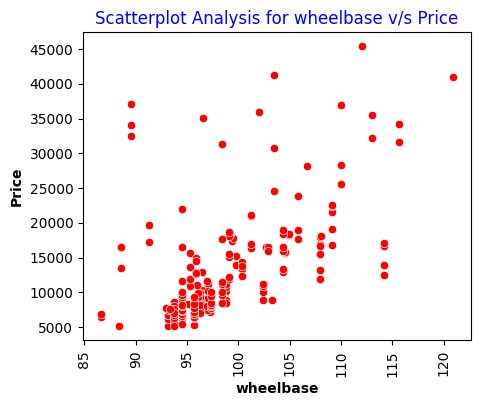

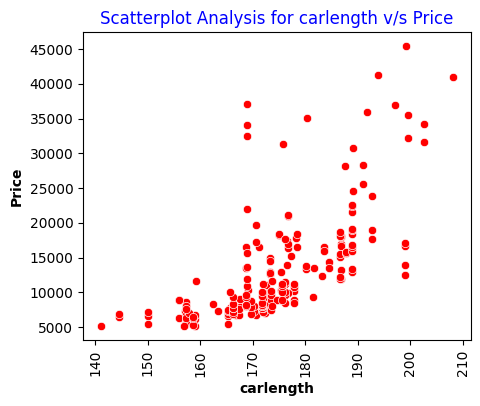

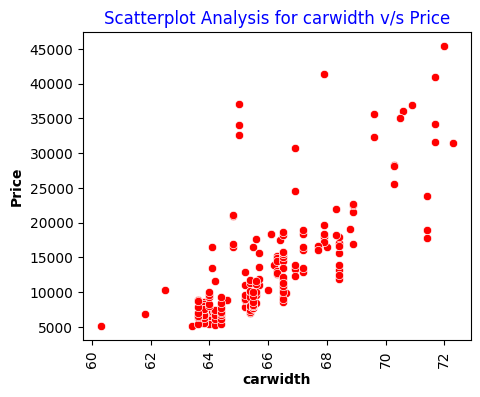

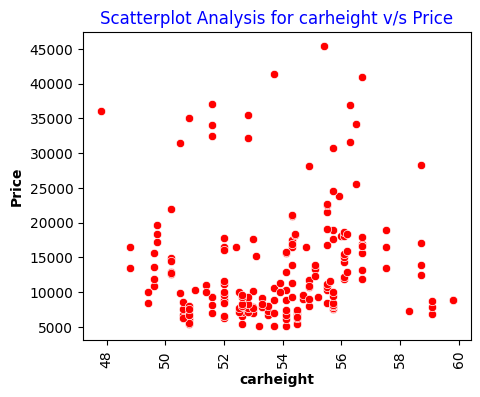

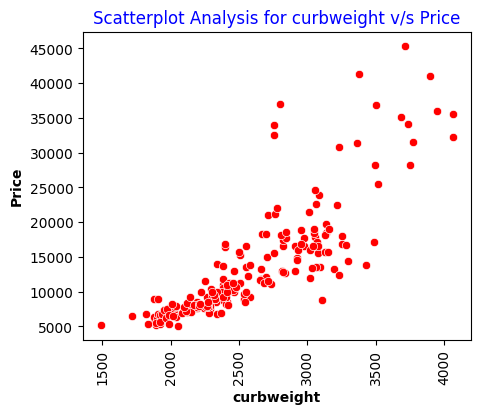

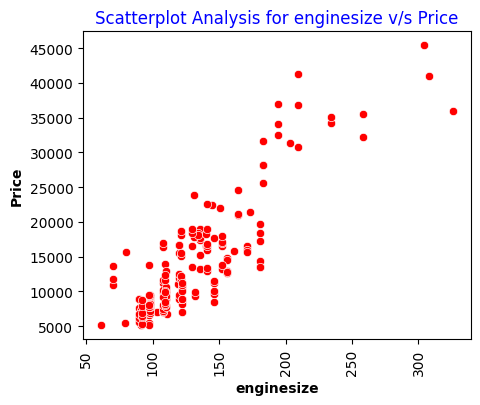

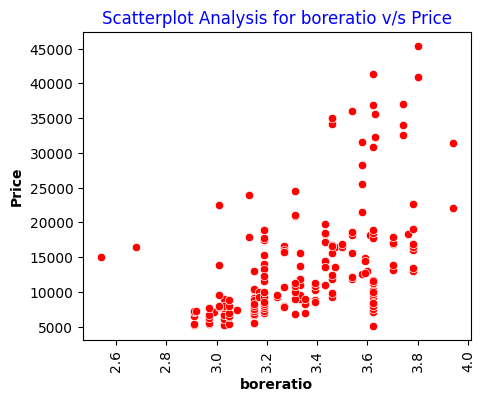

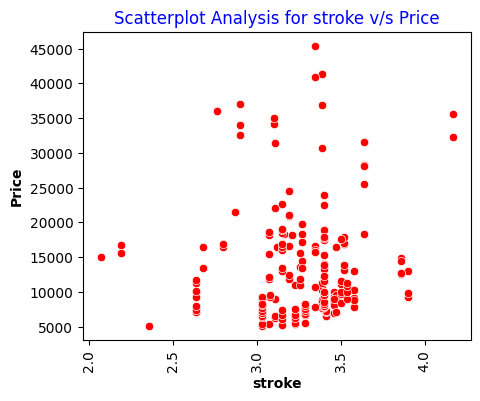

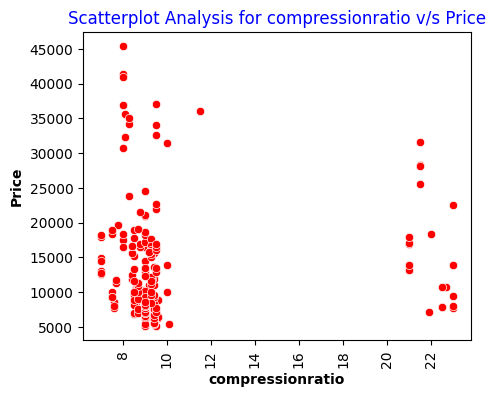

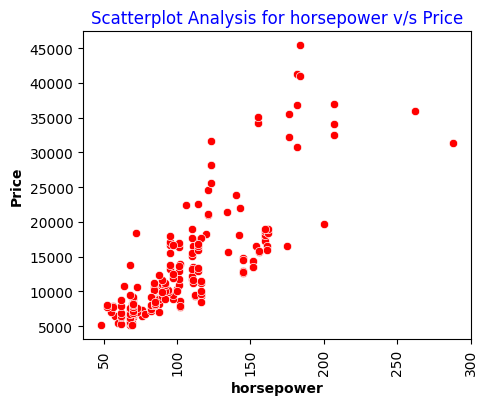

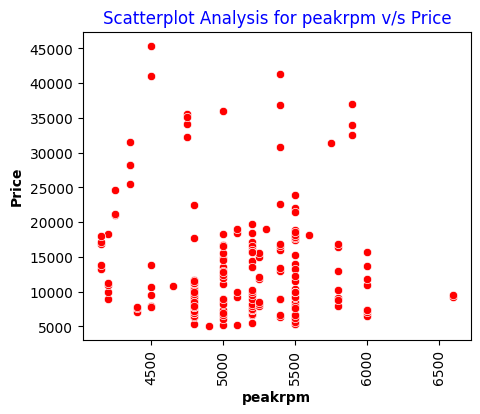

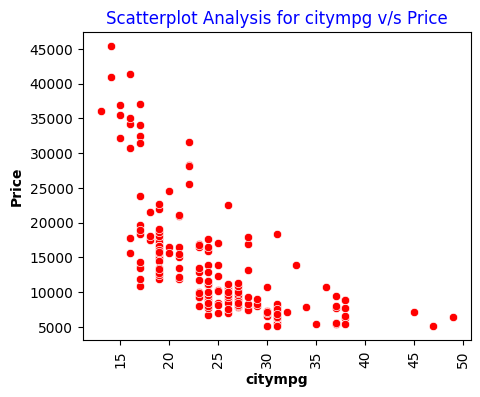

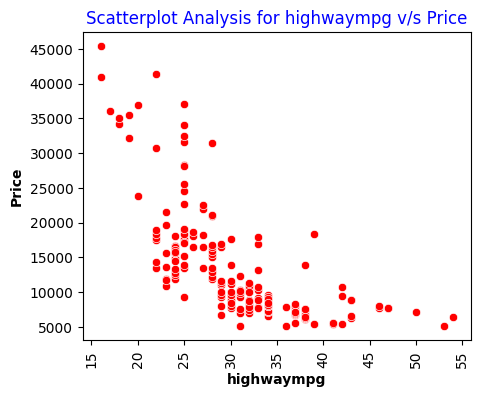

In [112]:
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
                     'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
                     'horsepower', 'peakrpm', 'citympg', 'highwaympg']
columns_to_plot_num = car_df[numerical_columns]

for column in columns_to_plot_num.columns:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=columns_to_plot_num[column], y=car_df['price'], data=car_df,color='r')
    plt.title(f'Scatterplot Analysis for {column} v/s Price' ,color='blue')
    plt.xlabel(column,fontweight='bold')
    plt.ylabel('Price',fontweight='bold')
    plt.xticks(rotation=90)
plt.show()

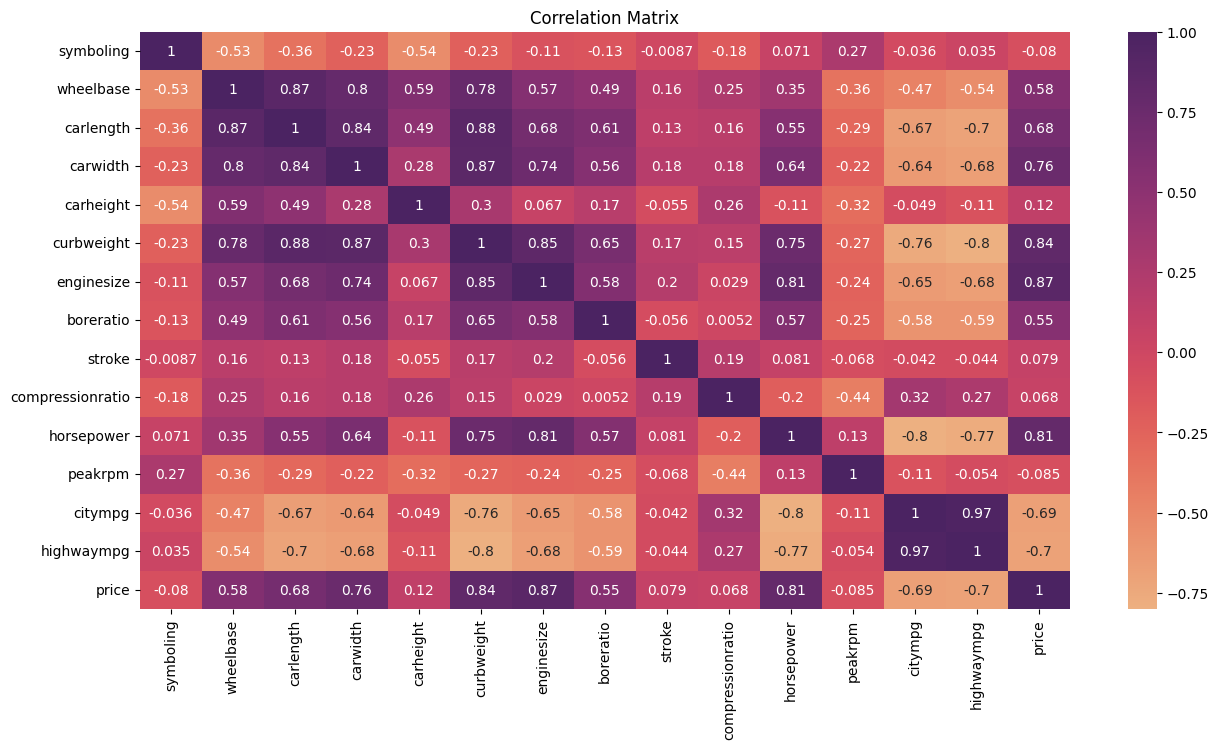

In [113]:
#
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = car_df.corr(numeric_only=True)

plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell
plt.title('Correlation Matrix')
plt.show()

There is positive correlation of columns car_length,car_width,curb_weight,enginesize,boreratio,horsepower with price and
Negative corelation of columns symboling, peakrpm,citympg,highwaympg with price


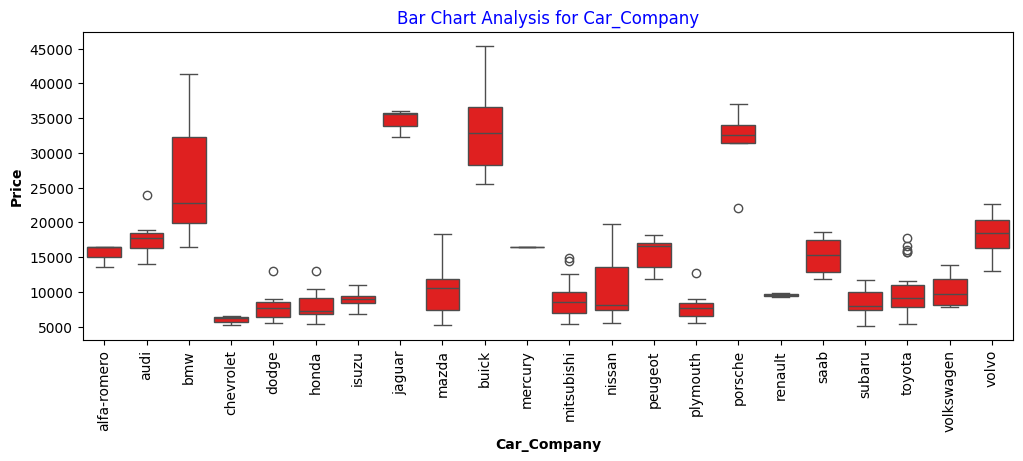

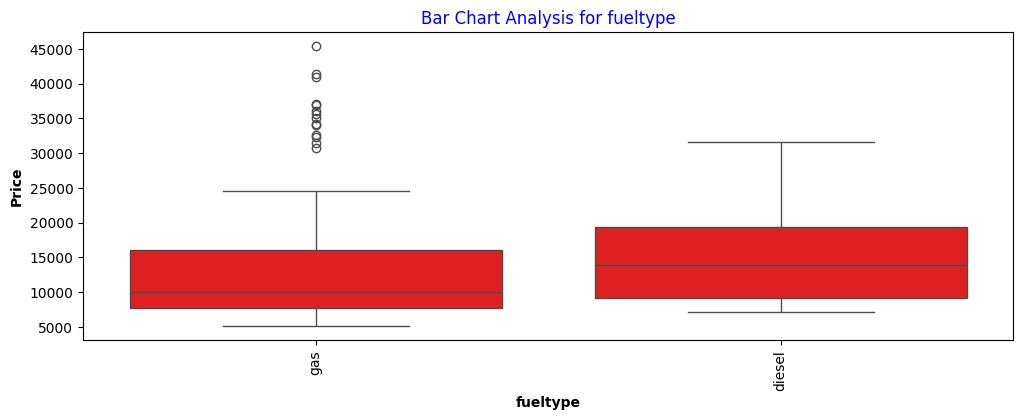

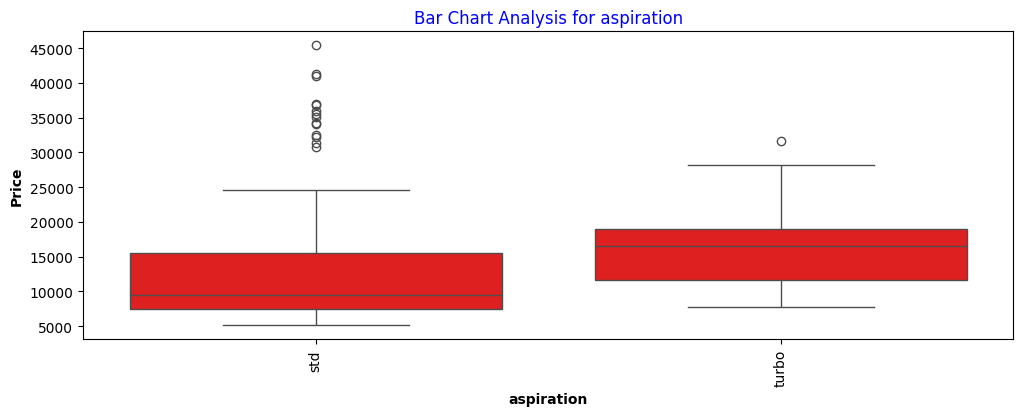

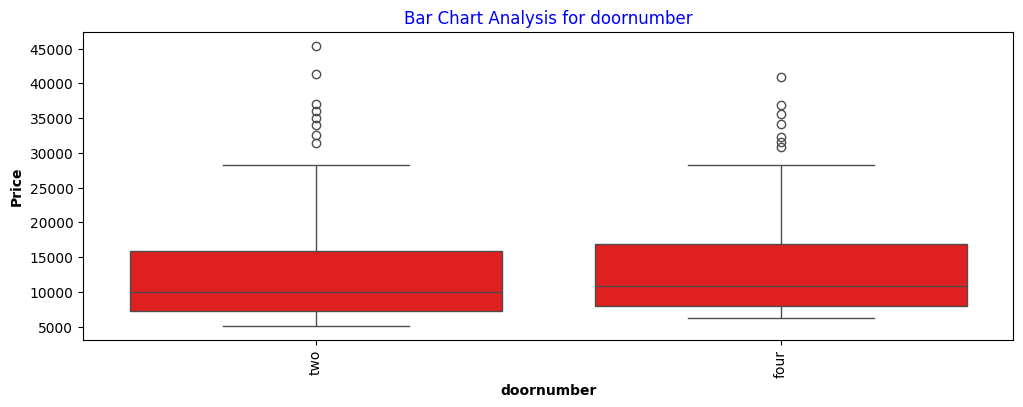

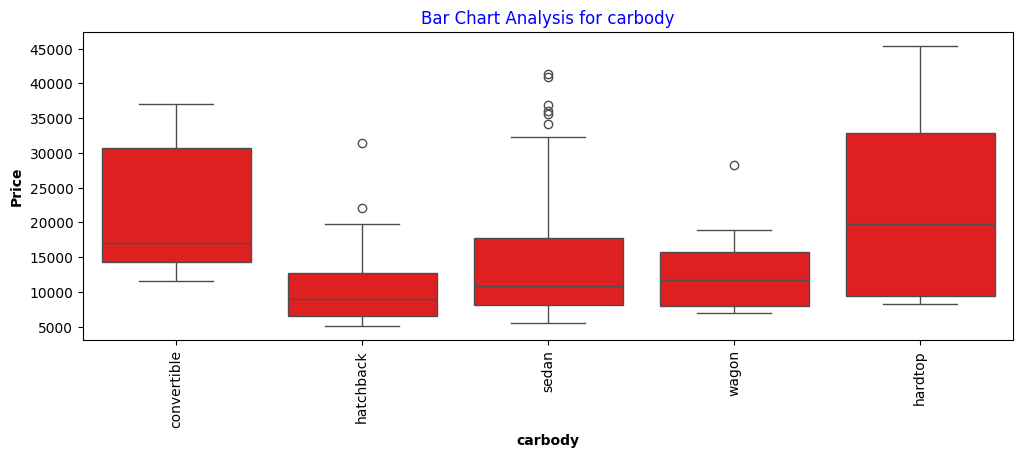

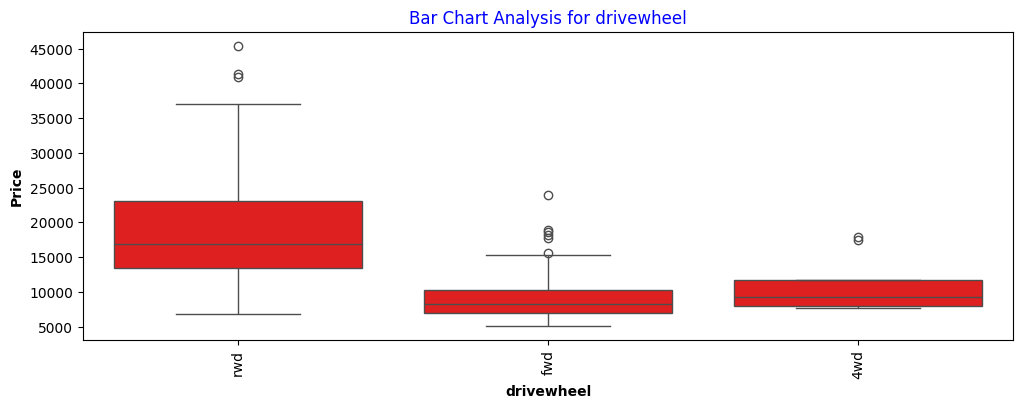

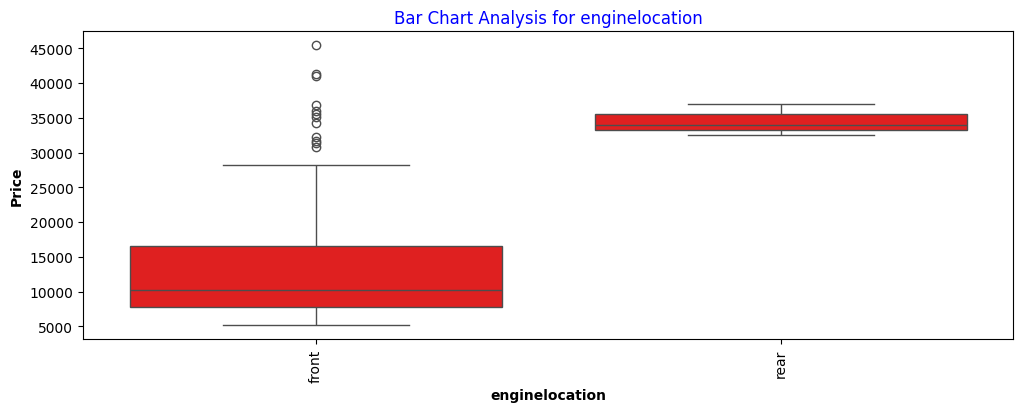

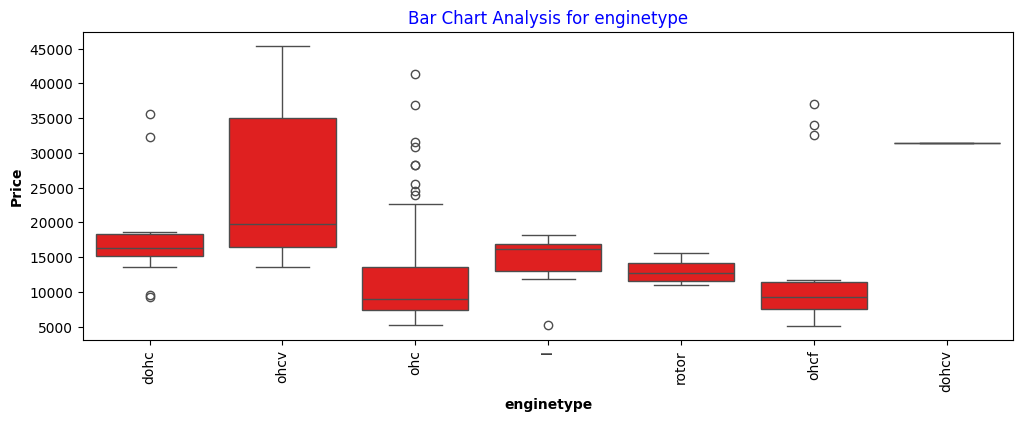

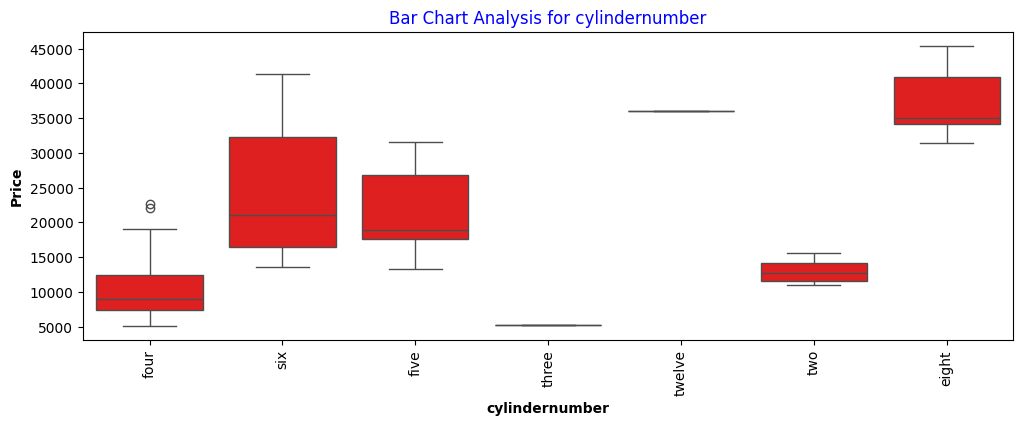

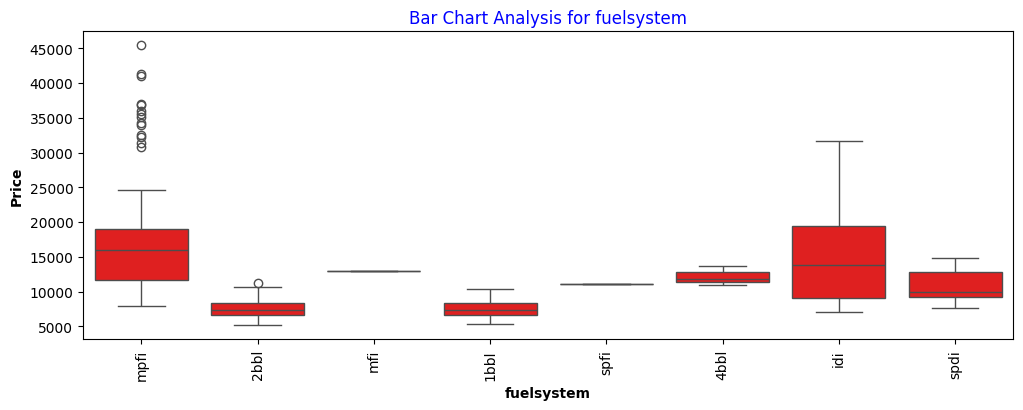

In [114]:
# Box Plot  plot for categorical columns

categorical_columns = ['Car_Company', 'fueltype', 'aspiration', 'doornumber', 
                       'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
                       'cylindernumber', 'fuelsystem']

columns_to_plot_cat = car_df[categorical_columns]

for column in columns_to_plot_cat.columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=columns_to_plot_cat[column], y='price', data=car_df,color='r')
    plt.title(f'Bar Chart Analysis for {column}',color='blue')
    plt.xlabel(column,fontweight='bold')
    plt.ylabel('Price',fontweight='bold')
    plt.xticks(rotation=90)
plt.show()

In [115]:
#drop highly negative corelated feature with price
car_df=car_df.drop(['symboling','carheight','stroke', 'compressionratio','peakrpm', 'citympg', 'highwaympg'], axis = 1)

In [116]:
car_df['fueltype'] = np.where(car_df['fueltype']=='gas',1,0)
car_df['aspiration'] = np.where(car_df['aspiration']=='std', 1, 0)
car_df['doornumber'] = np.where(car_df['doornumber']=='two', 1, 0)
car_df['enginelocation'] = np.where(car_df['enginelocation']=='front',1,0)


In [117]:
car_df = pd.get_dummies(car_df)
car_df


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,1,1,1,94.5,171.2,65.5,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,1,1,0,1,99.8,176.6,66.2,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,1,1,0,1,99.4,176.6,66.4,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,0,1,109.1,188.8,68.9,2952,141,3.78,...,False,False,False,False,False,False,False,True,False,False
201,1,0,0,1,109.1,188.8,68.8,3049,141,3.78,...,False,False,False,False,False,False,False,True,False,False
202,1,1,0,1,109.1,188.8,68.9,3012,173,3.58,...,False,False,False,False,False,False,False,True,False,False
203,0,0,0,1,109.1,188.8,68.9,3217,145,3.01,...,False,False,False,False,False,True,False,False,False,False


In [118]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fueltype                 205 non-null    int32  
 1   aspiration               205 non-null    int32  
 2   doornumber               205 non-null    int32  
 3   enginelocation           205 non-null    int32  
 4   wheelbase                205 non-null    float64
 5   carlength                205 non-null    float64
 6   carwidth                 205 non-null    float64
 7   curbweight               205 non-null    int64  
 8   enginesize               205 non-null    int64  
 9   boreratio                205 non-null    float64
 10  horsepower               205 non-null    int64  
 11  price                    205 non-null    float64
 12  Car_Company_alfa-romero  205 non-null    bool   
 13  Car_Company_audi         205 non-null    bool   
 14  Car_Company_bmw          2

In [119]:
car_df

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,1,1,1,94.5,171.2,65.5,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,1,1,0,1,99.8,176.6,66.2,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,1,1,0,1,99.4,176.6,66.4,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,0,1,109.1,188.8,68.9,2952,141,3.78,...,False,False,False,False,False,False,False,True,False,False
201,1,0,0,1,109.1,188.8,68.8,3049,141,3.78,...,False,False,False,False,False,False,False,True,False,False
202,1,1,0,1,109.1,188.8,68.9,3012,173,3.58,...,False,False,False,False,False,False,False,True,False,False
203,0,0,0,1,109.1,188.8,68.9,3217,145,3.01,...,False,False,False,False,False,True,False,False,False,False


In [120]:
Q1=car_df.price.quantile(0.25)
Q3=car_df.price.quantile(0.75)
IQR=Q3-Q1

car_df = car_df[~((car_df < (Q1 - 1.5 * IQR)) |(car_df > (Q3 + 1.5 * IQR))).any(axis=1)]
car_df

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,1,1,1,1,94.5,171.2,65.5,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,1,1,0,1,99.8,176.6,66.2,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,1,1,0,1,99.4,176.6,66.4,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,0,1,109.1,188.8,68.9,2952,141,3.78,...,False,False,False,False,False,False,False,True,False,False
201,1,0,0,1,109.1,188.8,68.8,3049,141,3.78,...,False,False,False,False,False,False,False,True,False,False
202,1,1,0,1,109.1,188.8,68.9,3012,173,3.58,...,False,False,False,False,False,False,False,True,False,False
203,0,0,0,1,109.1,188.8,68.9,3217,145,3.01,...,False,False,False,False,False,True,False,False,False,False


In [121]:
# Features "Inputs" (X)
X = car_df.drop(columns=['price'])

# Target variable "Outputs" (Y)
Y = car_df[['price']]

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
#print("Columns of X:", X.columns.tolist())

Shape of X: (190, 63)
Shape of Y: (190, 1)


In [122]:
# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)


In [123]:
X_scaled

array([[1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [124]:
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,1.0,1.0,0.0,0.072464,0.479239,0.342342,0.468612,0.565574,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.072464,0.479239,0.342342,0.468612,0.565574,0.664286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.286232,0.520761,0.468468,0.590186,0.745902,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.478261,0.614187,0.531532,0.375332,0.393443,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.463768,0.614187,0.549550,0.590628,0.614754,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.0,1.0,0.0,0.0,0.815217,0.825260,0.774775,0.647215,0.655738,0.885714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
186,1.0,0.0,0.0,0.0,0.815217,0.825260,0.765766,0.690097,0.655738,0.885714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
187,1.0,1.0,0.0,0.0,0.815217,0.825260,0.774775,0.673740,0.918033,0.742857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.815217,0.825260,0.774775,0.764368,0.688525,0.335714,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [125]:
X.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'Car_Company_alfa-romero', 'Car_Company_audi',
       'Car_Company_bmw', 'Car_Company_buick', 'Car_Company_chevrolet',
       'Car_Company_dodge', 'Car_Company_honda', 'Car_Company_isuzu',
       'Car_Company_jaguar', 'Car_Company_mazda', 'Car_Company_mercury',
       'Car_Company_mitsubishi', 'Car_Company_nissan', 'Car_Company_peugeot',
       'Car_Company_plymouth', 'Car_Company_porsche', 'Car_Company_renault',
       'Car_Company_saab', 'Car_Company_subaru', 'Car_Company_toyota',
       'Car_Company_volkswagen', 'Car_Company_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohc

# PCA for dimensinality reduction

In [126]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X=pca.fit_transform(X)
X.shape


(190, 24)

In [127]:
Y=Y.values

In [128]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [129]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (152, 24)
Shape of X_test: (38, 24)
Shape of Y_train: (152, 1)
Shape of Y_test: (38, 1)


# Regression Model

In [130]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
X_train
X_test

array([[ 7.82858611e-01,  7.92849743e-01, -4.86641941e-01,
        -8.38074970e-01, -4.66501846e-01,  1.02333801e-01,
         2.16475869e-01, -4.61297866e-01,  1.46967247e-01,
         1.51449058e-01, -1.23671631e-01, -2.30248065e-01,
        -4.90601387e-02, -3.06248540e-01, -2.84062176e-01,
         1.97104918e-01,  3.09141460e-01, -2.41770425e-01,
        -1.09240806e-01,  9.39154750e-01,  1.75385211e-01,
         6.44893490e-02, -4.35454364e-01, -1.08198351e-01],
       [ 7.23291881e-01, -8.99883697e-01,  4.13289241e-02,
         9.07034976e-02,  1.41492101e-01, -1.84616467e-01,
         1.09128650e-02, -5.19325312e-01,  6.49477810e-03,
         2.33762391e-01,  8.16223386e-03, -2.87986933e-01,
         7.62710204e-02, -3.48486689e-01,  4.44174731e-01,
         1.46039718e-01, -2.49699320e-01,  1.57798166e-03,
        -1.34112713e-02, -3.28494749e-01, -1.39917809e-01,
        -5.54315777e-02,  1.39829683e-01, -7.56813520e-02],
       [-1.17763046e-01, -7.23687004e-01,  7.68213550e

In [132]:
reg=LinearRegression() # Object Creation
reg.fit(X_train,Y_train) # Model Building

LinearRegression()

In [133]:
pred=reg.predict(X_test) # testimg mx+c
pred

array([[ 8486.13970122],
       [ 9401.52931524],
       [ 9492.47342062],
       [16839.73391369],
       [ 5979.9824515 ],
       [12251.60180378],
       [ 5699.21424131],
       [ 6284.67871265],
       [ 6994.81117768],
       [19648.84140514],
       [17084.68213555],
       [17839.273022  ],
       [12832.71139779],
       [ 9704.67916669],
       [16884.58039821],
       [14644.26635444],
       [ 8973.02402727],
       [ 6993.7491516 ],
       [ 4727.22906776],
       [ 7855.15605343],
       [10516.91847699],
       [15769.03170016],
       [12804.80060882],
       [16509.21616533],
       [10616.7353372 ],
       [10958.51992085],
       [24672.93579973],
       [14956.02502725],
       [11506.06316825],
       [ 7861.38145371],
       [18683.95889586],
       [ 9967.70507591],
       [18737.52196289],
       [ 7677.17799874],
       [ 7683.46436986],
       [11741.47792412],
       [17082.12207911],
       [ 5738.87963273]])

In [134]:
reg.score(X_test,Y_test)

0.8880760627878068

In [135]:
#sns.regplot(data=car_df, x=X_test, y=pred, ci=None) plt.xlabel('X_test')
#plt.ylabel('Predicted Price') plt.title('Regression Plot of Predicted Price vs. X_test') plt.show()

sns.regplot(x=X_test, y=pred, ci=None)
plt.xlabel('X_test')  
plt.ylabel('Predicted Price') 
plt.title('Regression Plot of Predicted Price vs. X_test')
plt.show()

# Evaluation

In [136]:
mse=mean_squared_error(Y_test,pred)
mse

3145400.7321437416

In [137]:
# Root Mean square
np.sqrt(mse)

1773.527764694915

In [138]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(reg,X,Y,cv=5)
score

array([ 0.27892438, -6.45895214, -0.54027971,  0.42039385,  0.06643582])

In [139]:
score.mean()

-1.2466955604854524

In [140]:
#r2 score
r2_score(Y_test,pred)


0.8880760627878068

# RANDOM FOREST

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
# Create a random forest regressor
rf=RandomForestRegressor(n_estimators=100,max_features=1.0,random_state=0)

In [143]:
rf.fit(X_train,Y_train) # Model Building

RandomForestRegressor(random_state=0)

In [144]:
pred_rf=rf.predict(X_test) # testimg mx+c
pred_rf

array([ 8167.15      ,  8441.375     , 10253.58      , 16582.64      ,
        8027.315     , 13747.32      ,  6412.28      ,  8211.67      ,
        9286.91      , 18364.35835   , 15669.88002   , 16666.98167   ,
       12502.22334   ,  9930.39      , 17777.49667   , 14866.61334   ,
        8886.08      ,  5976.58      ,  5940.96      ,  8651.925     ,
        8871.155     , 16927.87      , 14637.25667   , 16464.78167   ,
        9323.9       , 14014.67916667, 23180.09668   , 18463.43334   ,
       10586.305     ,  8273.4       , 18909.48837   ,  8381.49      ,
       18202.66501   ,  6914.11      ,  6929.68      , 10045.485     ,
       14687.32668   ,  7708.285     ])

# Evaluation

In [145]:
mse=mean_squared_error(Y_test,pred_rf)
mse

3964909.8740567747

In [146]:
r2_score(Y_test,pred_rf)

0.8589151712018946

# Decission Tree Regressor

In [147]:
# Decission Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
parameters = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_features': ["sqrt", "log2"]
}

In [149]:
# Create a Decission Tree regressor
dtr=DecisionTreeRegressor()
gd=GridSearchCV(dtr,parameters)

In [150]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [151]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [152]:
pred_dtr=dtr.predict(X_test)
pred_dtr

array([11595., 16515.,  6692.,  6488., 17950.,  6575., 17450.,  5195.,
        7738., 10345.,  6229., 15645.,  6229., 15690.,  6849., 12170.,
       15580.,  6488.,  8495.,  7129.,  7129.,  7775.,  8449., 17950.,
        6989.,  7126.,  8499.,  6229.,  6795.,  8921., 11595.,  6488.,
       13950.,  9895.,  9495., 15690.,  6649.,  7463.])

In [153]:
# Evaluation
mse=mean_squared_error(Y_test,pred_dtr)
mse

3243405.154839184

In [154]:
r2_score(Y_test,pred_dtr)

0.8070496865230066

## Support Vector Regressor

In [155]:
from sklearn.svm import SVR


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [157]:
svr_model=SVR(kernel='rbf',C=3)

In [158]:
SVR?

Init signature:
SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
Docstring:     
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`~sklearn.svm.LinearSVR` or
:class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
     Specifies the kernel type to be used in the algorithm.
     If none 

In [159]:
svr_model.fit(X_train,Y_train)
svr_y_pred=svr_model.predict(X_test)
svr_y_pred

array([10343.81432866, 10380.26591852, 10313.85578047, 10316.12202327,
       10376.76875549, 10339.39554724, 10367.61412764, 10309.50010202,
       10307.87459795, 10333.42692197, 10314.91687145, 10377.96609383,
       10316.68344356, 10373.00549136, 10309.32096672, 10356.04057879,
       10383.14612857, 10316.14789357, 10320.46946521, 10303.78508994,
       10322.43373589, 10349.80965754, 10363.18908818, 10376.73597093,
       10344.77715982, 10331.08793772, 10333.15443298, 10316.68344356,
       10317.58475764, 10315.81738247, 10346.08975741, 10316.20920618,
       10364.42877441, 10353.11215125, 10341.03977689, 10372.98042264,
       10311.94686457, 10325.01557234])

In [160]:
#Evaluation
mse=mean_squared_error(Y_test,svr_y_pred)
mse

17079904.699203696

In [161]:
r2_score(Y_test,svr_y_pred)

-0.016084272096413166